In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

# 분석목표 및 사용 데이터

## 목표

- 2023-2024년 따릉이 고장 신고 데이터를 기반으로, 주요 고장 부품과 서울시 평균 기온 간의 관계를 회귀 분석을 통해 규명

## 분석 단계

- 1. 2023-2024 부품별 고장신고 횟수 파악
- 2. 2023-2024 부품별 고장신고 & 2023-2024 서울시 월병 평균 온도 병합
- 3. 주요 고장 부품과 서울시 평균 기온 회귀 분석

## 분석에 사용할 데이터

- 분석 단계 1
    - 서울특별시 공공자전거 고장신 내역
        - 출처: 서울 열린데이터 광장
        - 링크: https://data.seoul.go.kr/dataList/OA-15644/F/1/datasetView.do

- 분석 단계 2
    - 월간 기후분석정보
        - 출처: 기상청
        - 링크: https://www.kma.go.kr/kma/archive/pub.jsp

- 고장신고내역, 날짜
- 평균기온정보

# 분석 단계 1

## 데이터 전처리

### 데이터 불러오기

In [ ]:
고장내역_23_1_6_data_path = '/content/서울시 공공자전거 고장신고 내역_23.1-6.xlsx'
고장내역_23_1_6 = pd.read_excel(고장내역_23_1_6_data_path)

고장내역_23_7_10_data_path = '/content/서울시 공공자전거 고장신고 내역_23.7-10.xlsx'
고장내역_23_7_10 = pd.read_excel(고장내역_23_7_10_data_path)

고장내역_23_11_12_data_path = '/content/서울시 공공자전거 고장신고 내역_23.11-12.xlsx'
고장내역_23_11_12= pd.read_excel(고장내역_23_11_12_data_path)

In [ ]:
고장내역_24_1_6_data_path = '/content/서울시 공공자전거 고장신고 내역_2401-2406.xlsx'
고장내역_24_1_6 = pd.read_excel(고장내역_24_1_6_data_path)

고장내역_24_7_12_data_path = '/content/서울시 공공자전거 고장신고 내역_2407-2412.xlsx'
고장내역_24_7_12 = pd.read_excel(고장내역_24_7_12_data_path)

### 데이터 합치기

In [ ]:
# 고장신고 통합파일
fault_reports = pd.concat(
    [고장내역_23_1_6, 고장내역_23_7_10, 고장내역_23_11_12, 고장내역_24_1_6, 고장내역_24_7_12],
    axis=0,
    ignore_index=True)

In [ ]:
fault_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334759 entries, 0 to 334758
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   자전거번호   334759 non-null  object        
 1   등록일시    334759 non-null  datetime64[ns]
 2   구분      334759 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.7+ MB


### 데이터 변환

In [ ]:
# 년도/월 별로 groupby 하기 위해 '년', '월' 컬럼 생성
fault_reports['년'] = fault_reports['등록일시'].dt.year
fault_reports['월'] = fault_reports['등록일시'].dt.month

In [ ]:
reports = fault_reports[['년', '월', '구분']]

In [ ]:
reports = reports.groupby(['년', '월', '구분']).size().reset_index(name='고장건수')


In [ ]:
reports

,년,월,구분,고장건수
0,2023,1,기타,3745
1,2023,1,단말기,410
2,2023,1,안장,1262
3,2023,1,체인,1656
4,2023,1,타이어,993
...,...,...,...,...
139,2024,12,단말기,358
140,2024,12,안장,1093
141,2024,12,체인,1575
142,2024,12,타이어,1273


### output data 저장하기 (2023-2024 부품별 고장신고접수 건수)

In [ ]:
# 각 자치구 별 8월 대여수 저장하기
reports.to_csv('2023-2024 부품별 고장신고접수 건수.csv', index=False, encoding='utf-8-sig')

# 분석 단계 2

## 데이터 불러오기

### 2023-2024 부품별 고장신고접수 건수

In [ ]:
reports.head()

### 2023-2024 서울시 월평균 기온

In [ ]:
temp_path = '/content/서울시 평균기온.xlsx'
temp = pd.read_excel(temp_path)

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점명      24 non-null     object        
 1   일시       24 non-null     datetime64[ns]
 2   평균기온(℃)  24 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 708.0+ bytes


## 데이터 변환

In [1]:
# '년', '월' groupby를 위해 '년', '월' 컬럼 생성
temp['년'] = temp['일시'].dt.year
temp['월'] = temp['일시'].dt.month

NameError: name 'temp' is not defined

In [ ]:
temp = temp[['년', '월', '평균기온(℃)']]

In [ ]:
temp

,년,월,평균기온(℃)
0,2023,1,-1.5
1,2023,2,2.3
2,2023,3,9.8
3,2023,4,13.8
4,2023,5,19.5
5,2023,6,23.4
6,2023,7,26.7
7,2023,8,27.2
8,2023,9,23.7
9,2023,10,15.8


## 2023-2024 부품별 고장신고 & 2023-2024 서울시 월병 평균 온도 병합

In [ ]:
reports_temp = reports.merge(temp, on=['년', '월'], how='left')

In [ ]:
reports_temp['구분'].unique()

array(['기타', '단말기', '안장', '체인', '타이어', '페달'], dtype=object)

In [ ]:
reports_temp['구분'] = reports_temp['구분'].str.strip()

# 분석 단계 3

In [ ]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.6 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

## 부품별 고장건수 시각화 (월별)

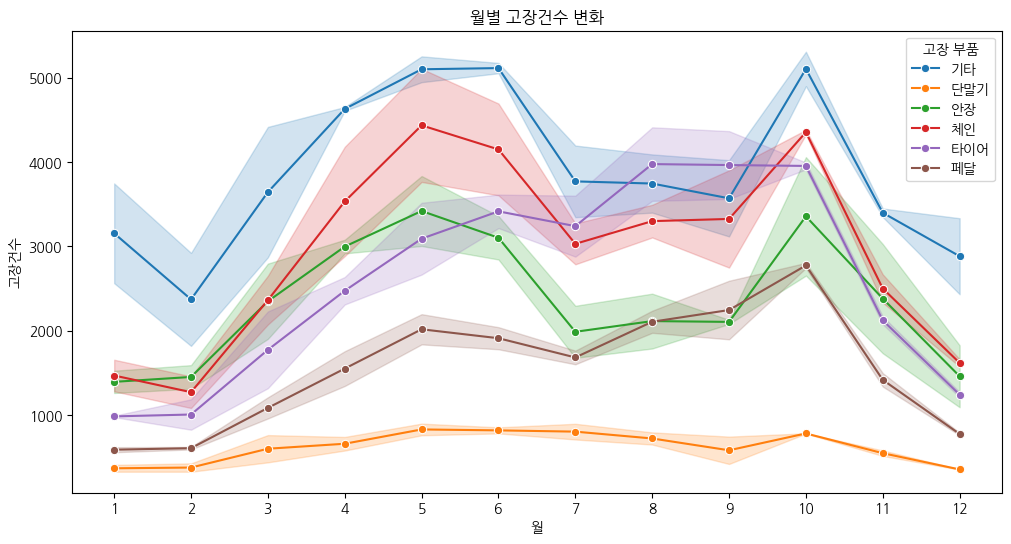

In [ ]:
# 부품별 고장건수 시각화 (월별)
plt.figure(figsize=(12, 6))
sns.lineplot(data=reports_temp, x="월", y="고장건수", hue="구분", marker="o")
plt.title("월별 고장건수 변화")
plt.xlabel("월")
plt.ylabel("고장건수")
plt.xticks(range(1, 13))
plt.legend(title="고장 부품")
plt.show()


## 타이어-온도 회귀분석 그래프

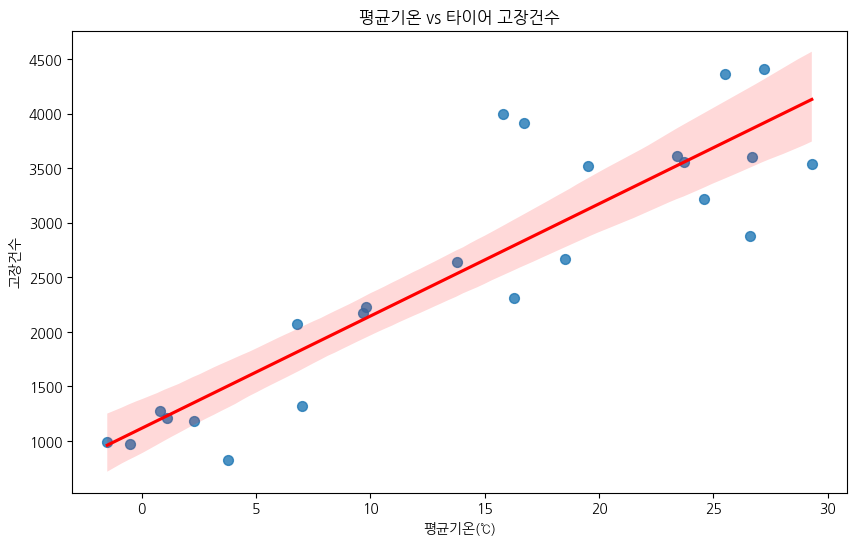

In [ ]:
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 특정 고장 유형 선택
fault_type = "타이어"  # 분석할 고장 부품
subset = reports_temp[reports_temp["구분"] == fault_type]  # 특정 부품 필터링

# 독립변수(X)와 종속변수(y) 설정
X = subset["평균기온(℃)"]
y = subset["고장건수"]

# 회귀선 그리기 (Seaborn 활용)
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, scatter_kws={"s": 50}, line_kws={"color": "red"})  # 산점도 + 회귀선

plt.title(f"평균기온 vs {fault_type} 고장건수")
plt.xlabel("평균기온(℃)")
plt.ylabel("고장건수")

plt.show()


## 기타-온도 회귀분석 그래프

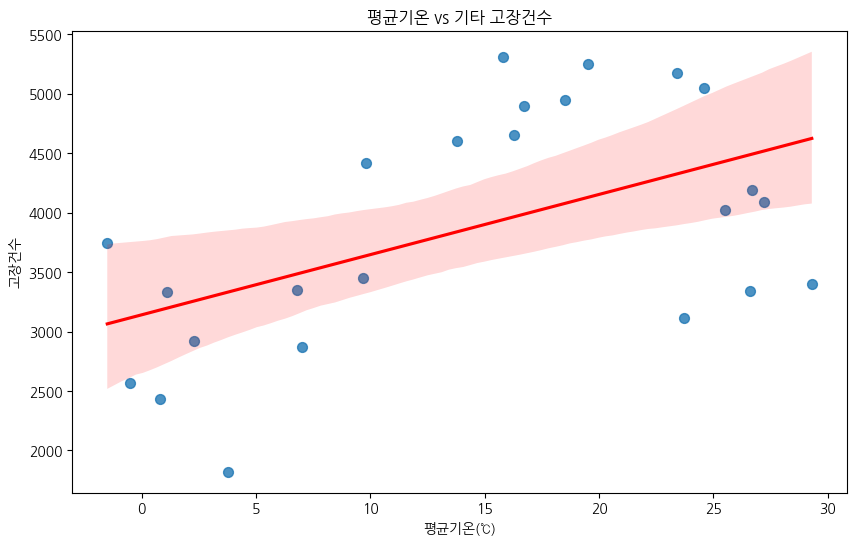

In [ ]:
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 특정 고장 유형 선택
fault_type = "기타"  # 분석할 고장 부품
subset = reports_temp[reports_temp["구분"] == fault_type]  # 특정 부품 필터링

# 독립변수(X)와 종속변수(y) 설정
X = subset["평균기온(℃)"]
y = subset["고장건수"]

# 회귀선 그리기 (Seaborn 활용)
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, scatter_kws={"s": 50}, line_kws={"color": "red"})  # 산점도 + 회귀선

plt.title(f"평균기온 vs {fault_type} 고장건수")
plt.xlabel("평균기온(℃)")
plt.ylabel("고장건수")


plt.show()

## 안장-온도 회귀분석 그래프

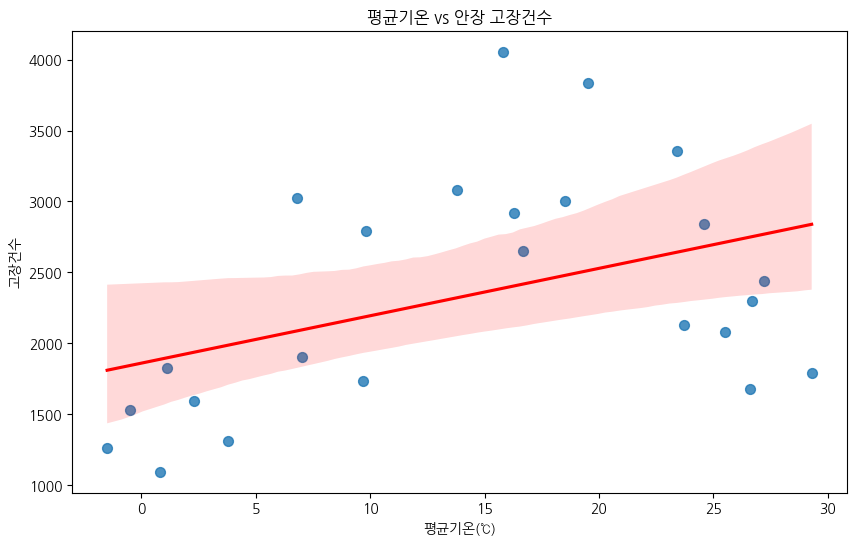

In [ ]:
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 특정 고장 유형 선택
fault_type = "안장"  # 분석할 고장 부품
subset = reports_temp[reports_temp["구분"] == fault_type]  # 특정 부품 필터링

# 독립변수(X)와 종속변수(y) 설정
X = subset["평균기온(℃)"]
y = subset["고장건수"]

# 회귀선 그리기 (Seaborn 활용)
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, scatter_kws={"s": 50}, line_kws={"color": "red"})  # 산점도 + 회귀선

plt.title(f"평균기온 vs {fault_type} 고장건수")
plt.xlabel("평균기온(℃)")
plt.ylabel("고장건수")

plt.show()

## 단말기-온도 회귀분석 그래프

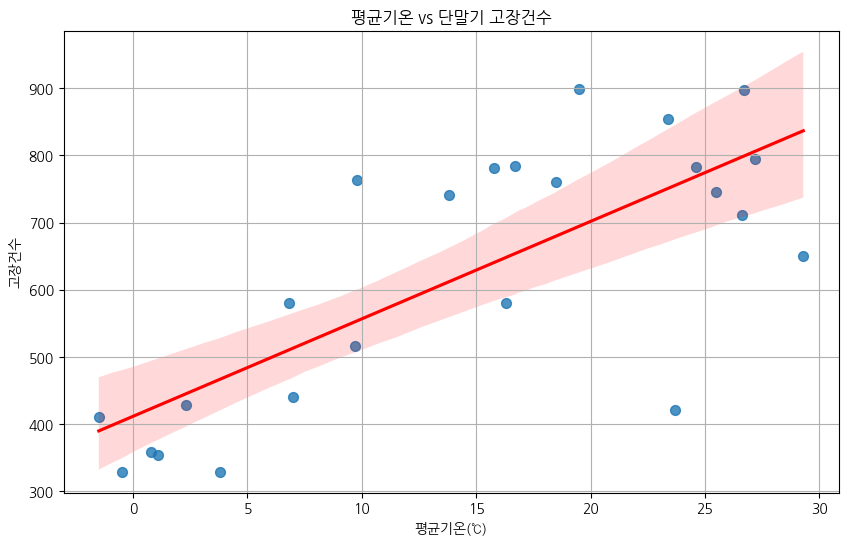

In [ ]:
# 한글 폰트 설정 (koreanize-matplotlib 없이 적용 가능)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 특정 고장 유형 선택
fault_type = "단말기"  # 분석할 고장 부품
subset = reports_temp[reports_temp["구분"] == fault_type]  # 특정 부품 필터링

# 독립변수(X)와 종속변수(y) 설정
X = subset["평균기온(℃)"]
y = subset["고장건수"]

# 회귀선 그리기 (Seaborn 활용)
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, scatter_kws={"s": 50}, line_kws={"color": "red"})  # 산점도 + 회귀선

plt.title(f"평균기온 vs {fault_type} 고장건수")
plt.xlabel("평균기온(℃)")
plt.ylabel("고장건수")
plt.grid()

plt.show()

## 페달-온도 회귀분석 그래프

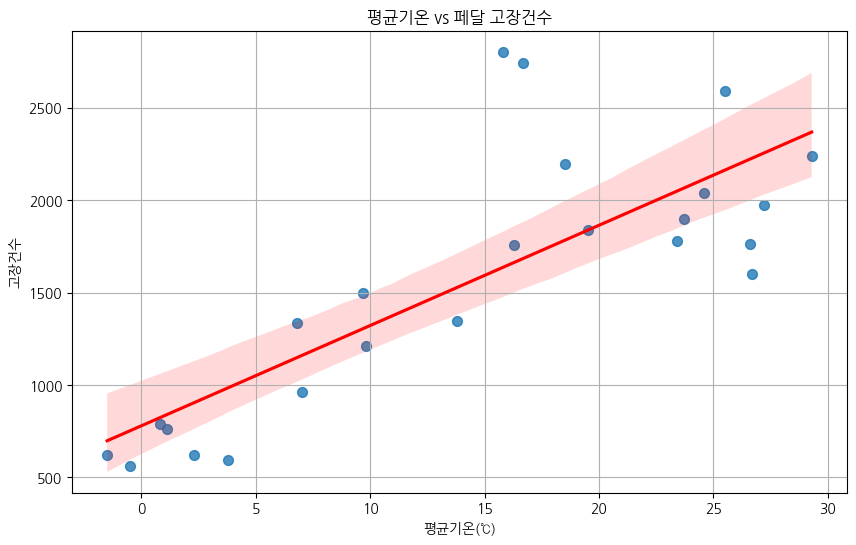

In [ ]:
# 한글 폰트 설정 (koreanize-matplotlib 없이 적용 가능)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 특정 고장 유형 선택
fault_type = "페달"  # 분석할 고장 부품
subset = reports_temp[reports_temp["구분"] == fault_type]  # 특정 부품 필터링

# 독립변수(X)와 종속변수(y) 설정
X = subset["평균기온(℃)"]
y = subset["고장건수"]

# 회귀선 그리기 (Seaborn 활용)
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, scatter_kws={"s": 50}, line_kws={"color": "red"})  # 산점도 + 회귀선

plt.title(f"평균기온 vs {fault_type} 고장건수")
plt.xlabel("평균기온(℃)")
plt.ylabel("고장건수")
plt.grid()

plt.show()

## 체인-온도 회귀분석 그래프

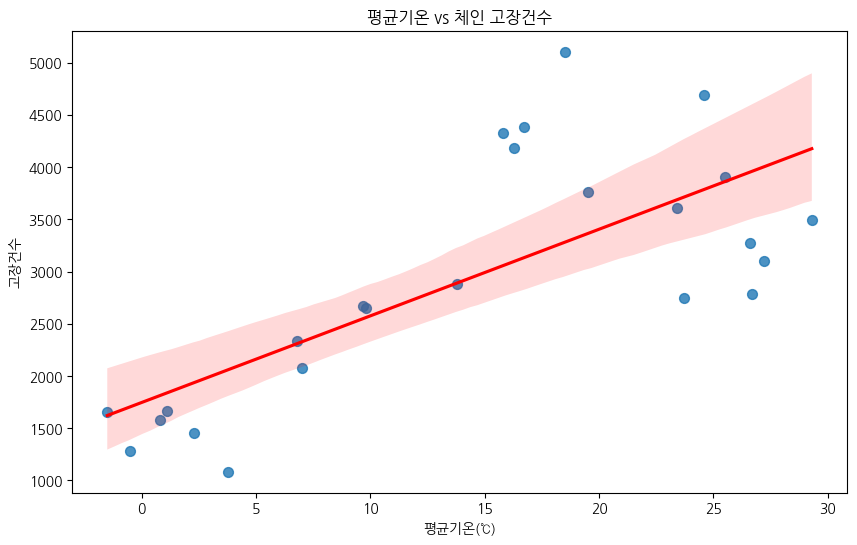

In [ ]:
# 한글 폰트 설정 (koreanize-matplotlib 없이 적용 가능)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 특정 고장 유형 선택
fault_type = "체인"  # 분석할 고장 부품
subset = reports_temp[reports_temp["구분"] == fault_type]  # 특정 부품 필터링

# 독립변수(X)와 종속변수(y) 설정
X = subset["평균기온(℃)"]
y = subset["고장건수"]

# 회귀선 그리기 (Seaborn 활용)
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, scatter_kws={"s": 50}, line_kws={"color": "red"})  # 산점도 + 회귀선

plt.title(f"평균기온 vs {fault_type} 고장건수")
plt.xlabel("평균기온(℃)")
plt.ylabel("고장건수")


plt.show()

## 고장사유-온도 회귀분석(수치) 표

In [ ]:
# 분석할 고장 유형 리스트
fault_types = ['기타', '단말기', '안장', '체인', '타이어', '페달']

# 결과 저장할 리스트
results = []

for fault_type in fault_types:  # 개별 고장 유형 처리
    # 특정 고장 유형 필터링 (여기서 비교 연산을 수행해야 함)
    subset = reports_temp[reports_temp["구분"] == fault_type].copy()  # 개별 고장 유형 필터링

    # NaN 제거 및 데이터 변환
    subset["평균기온(℃)"] = pd.to_numeric(subset["평균기온(℃)"], errors="coerce")
    subset["고장건수"] = pd.to_numeric(subset["고장건수"], errors="coerce")
    subset = subset.dropna(subset=["평균기온(℃)", "고장건수"])

    if subset.empty:
        print(f"⚠ '{fault_type}' 데이터가 없습니다.")
        continue  # 데이터가 없으면 다음 항목으로 넘어감

    # 독립변수(X)와 종속변수(y) 설정
    X = subset["평균기온(℃)"]
    y = subset["고장건수"]

    # 상수항 추가 (절편 포함)
    X = sm.add_constant(X)

    # OLS 회귀 분석 수행
    model = sm.OLS(y, X).fit()

    # 결과 추출
    coef = model.params["평균기온(℃)"]  # 회귀 계수(OCEF)
    r_squared = model.rsquared  # 결정계수(R-squared)
    p_value = model.pvalues["평균기온(℃)"]  # P-value

    # 결과 리스트에 저장
    results.append([fault_type, coef, r_squared, p_value])

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results, columns=["고장 유형", "OCEF(회귀 계수)", "R-squared", "P-value"])


In [ ]:
# 고장사유-온도_회귀분석_표
results_df

,고장 유형,OCEF(회귀 계수),R-squared,P-value
0,기타,50.668099,0.271077,9.095363e-03
1,단말기,14.514428,0.574265,1.795540e-05
2,안장,33.439202,0.174980,4.192717e-02
3,체인,82.922247,0.535525,4.824124e-05
4,타이어,102.878235,0.800229,3.763814e-09
5,페달,54.249512,0.632080,3.456970e-06


### output data 저장하기 (고장사유-온도_회귀분석_표)

In [ ]:
# 엑셀 파일로 저장
results_df.to_excel("고장사유-온도_회귀분석_표.xlsx", index=False)
